In [17]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [12]:
breast_cancer = load_breast_cancer()
data = breast_cancer.data
features = breast_cancer.feature_names
df = pd.DataFrame(data, columns = features)
print(df.shape)
print(features)

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [25]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


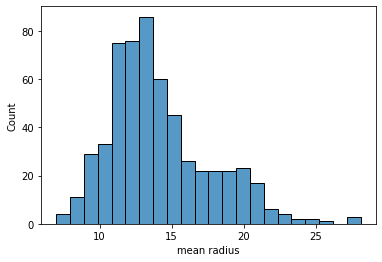

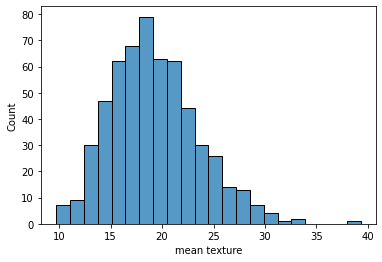

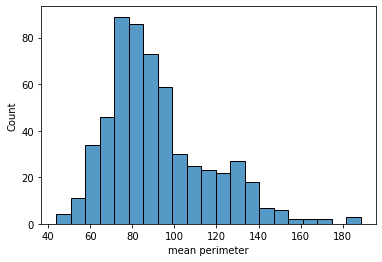

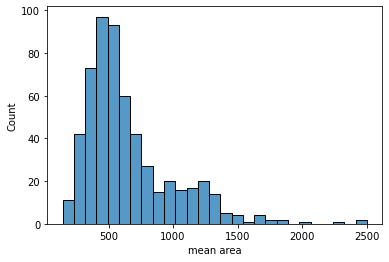

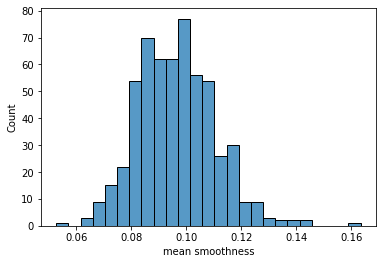

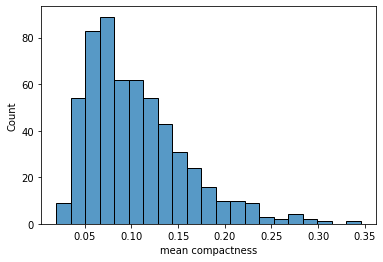

In [16]:
# Pegando apenas os 6 primeiros features para o exemplo
# Checando distribuição dos dados, pré-processamento
df_small = df.iloc[:,:6]
for column in df_small.columns:
    plt.figure()             
    sns.histplot(df_small[column])

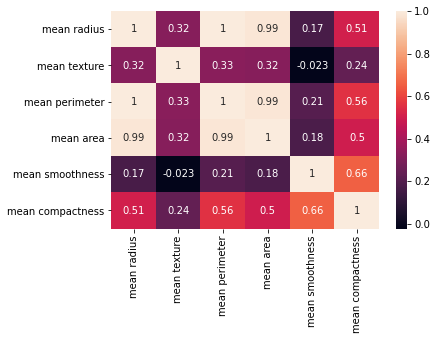

In [37]:
# Correlação de Pearson sem processamento
corr_mat_pre = df_small.corr() # Padrão = Pearson
sns.heatmap(corr_mat_pre, annot = True)
plt.show()

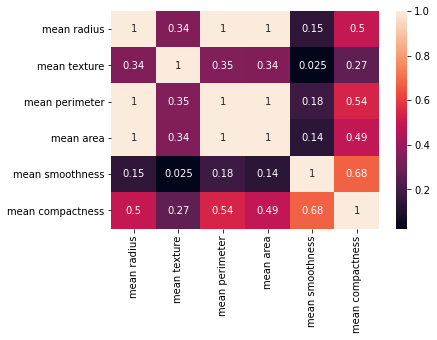

In [93]:
# Spearman sem processamento
corr_mat_pre = df_small.corr('spearman') # SPEARMAN
sns.heatmap(corr_mat_pre, annot = True)
plt.show()

In [23]:
# Aplicando normalização com preprocessing.normalize
normalized_data=preprocessing.normalize(df_small.values)
norm_data = pd.DataFrame(normalized_data, columns=[df_small.columns])
norm_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
0,0.017835,0.010290,0.121739,0.992349,0.000117,0.000275
1,0.015432,0.013332,0.099706,0.994808,0.000064,0.000059
2,0.016268,0.017557,0.107407,0.993927,0.000091,0.000132
3,0.028947,0.051659,0.196649,0.978684,0.000361,0.000720
4,0.015557,0.010995,0.103584,0.994438,0.000077,0.000102
...,...,...,...,...,...,...
564,0.014508,0.015066,0.095550,0.995205,0.000075,0.000078
565,0.015872,0.022274,0.103447,0.994259,0.000077,0.000082
566,0.019179,0.032443,0.125127,0.991425,0.000098,0.000118
567,0.016179,0.023036,0.110034,0.993529,0.000093,0.000218


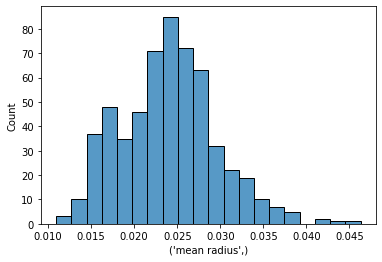

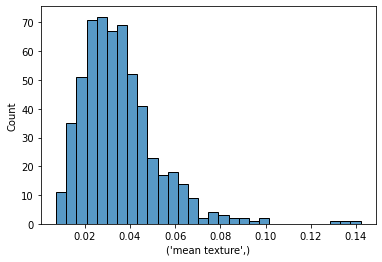

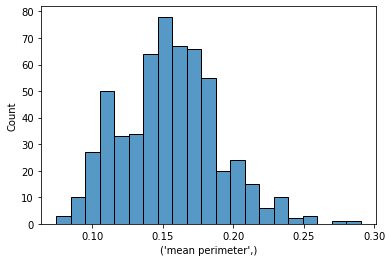

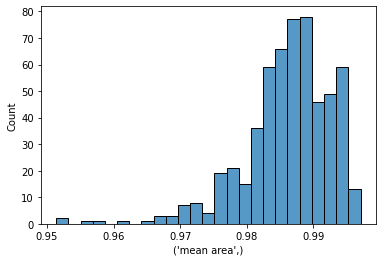

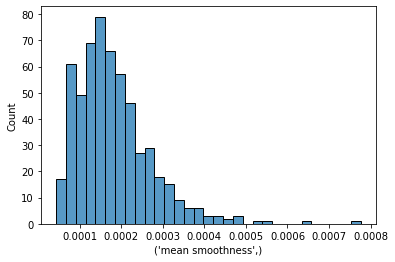

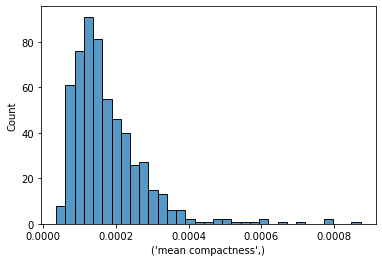

In [26]:
for column in norm_data.columns:
    plt.figure()             
    sns.histplot(norm_data[column])

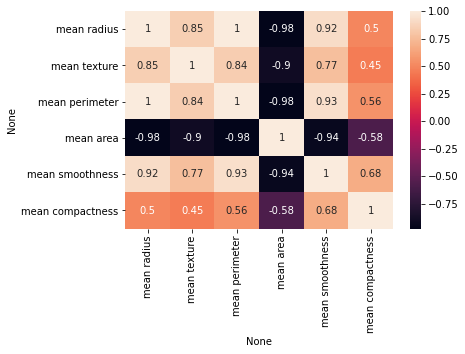

In [38]:
# Correlação de Pearson com normalização
corr_mat_norm = norm_data.corr() # Padrão = Pearson
sns.heatmap(corr_mat_norm, annot = True)
plt.show()

In [40]:
# Standardize - Padronização
standardized_data = preprocessing.scale(df_small.values)
stand_data = pd.DataFrame(standardized_data, columns=[df_small.columns])
stand_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340
...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144


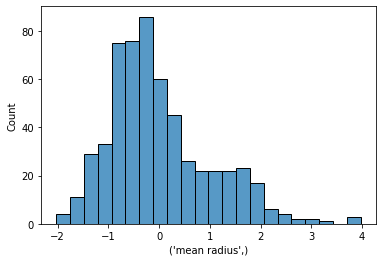

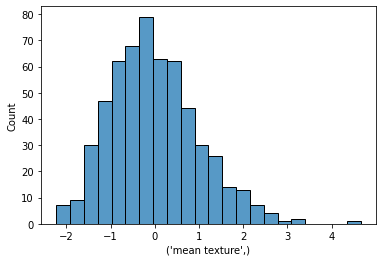

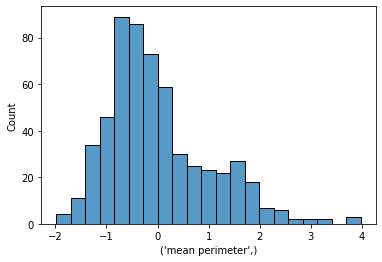

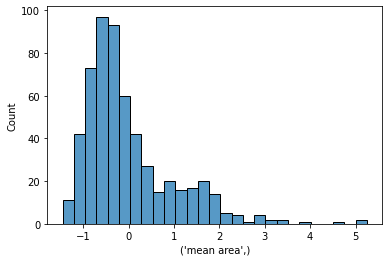

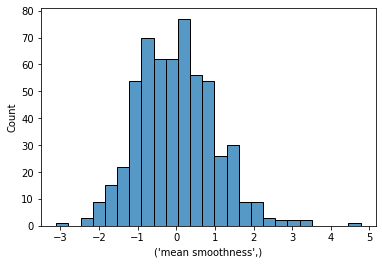

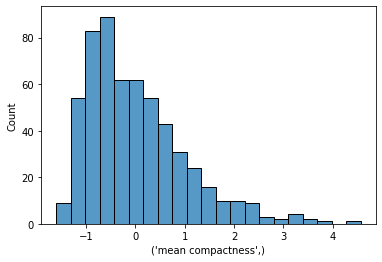

In [41]:
for column in stand_data.columns:
    plt.figure()             
    sns.histplot(stand_data[column])

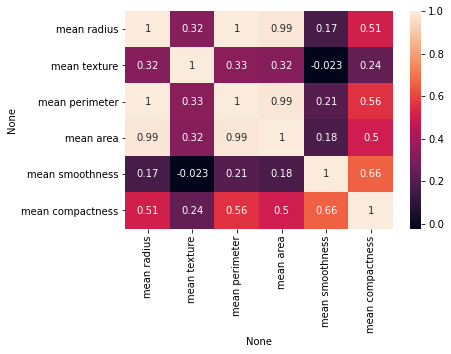

In [42]:
# Correlação de Pearson com padronização
corr_mat_stand = stand_data.corr() # Padrão = Pearson
sns.heatmap(corr_mat_stand, annot = True)
plt.show()

'''Any distribution can be converted to a standardised distribution. 
However the symmetry of the original distribution remains unchanged. 
If the original distribution was skewed to start with, it will still be skewed
after the z-score transformation. 

In the special case where the original distribution
can be considered normal, standardising will result in what is known as the standard 
normal distribution. The advantage of this is that tables exist in any statistics textbook
for the area under the curve for the standard normal distribution (or "normal curve"). 
From these tables you can estimate the answer to many questions about the original distribution.'''

## Spearman

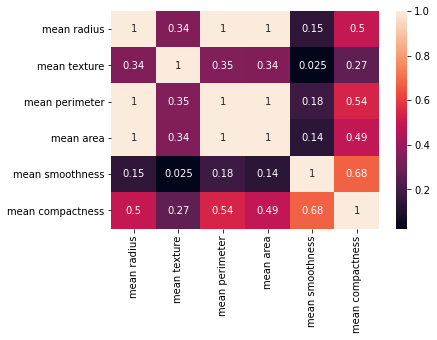

In [43]:
# Correlação de Spearman sem processamento
corr_mat_pre = df_small.corr('spearman') # Spearman
sns.heatmap(corr_mat_pre, annot = True)
plt.show()

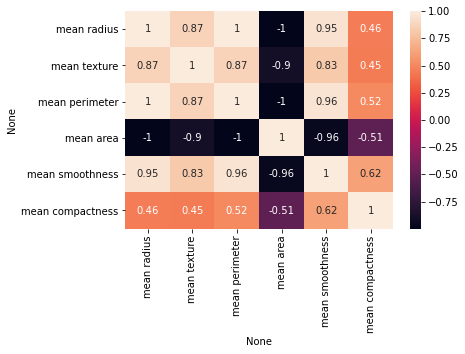

In [44]:
# Correlação de Spearman com normalização
corr_mat_norm = norm_data.corr('spearman') # Spearman
sns.heatmap(corr_mat_norm, annot = True)
plt.show()

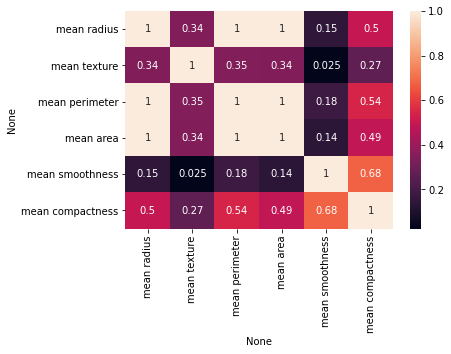

In [45]:
# Correlação de Spearman com padronização
corr_mat_stand = stand_data.corr('spearman') # Spearman
sns.heatmap(corr_mat_stand, annot = True)
plt.show()

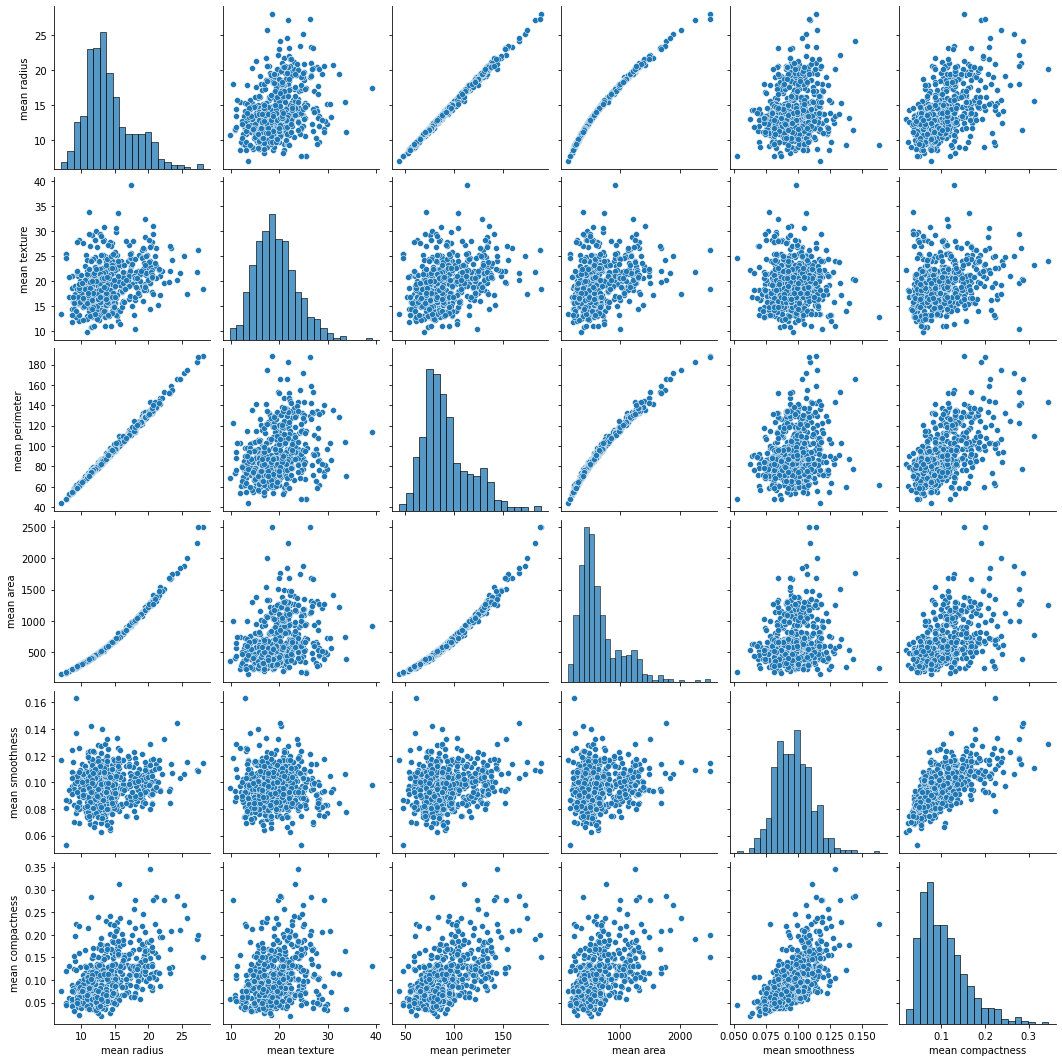

In [51]:
# scatter matrix para checar as linearidades das relações
sns.pairplot(df_small)

# Aplicando transformação logaritmica para normalizar

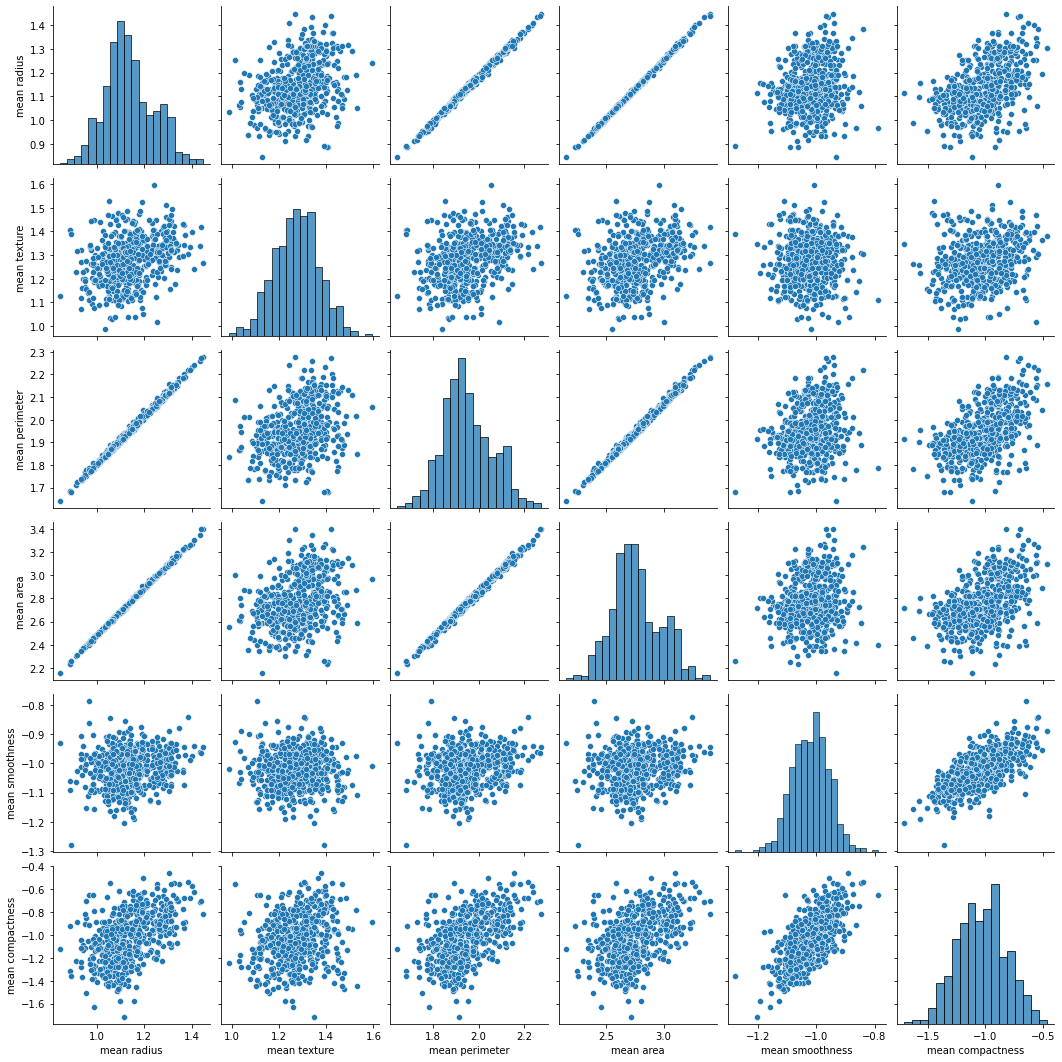

In [57]:
'''
When the distribution of the continuous data is non-normal, transformations of data 
are applied to make the data as "normal" as possible and, thus, increase the validity
of the associated statistical analyses. The log transformation is, arguably, the most
popular among the different types of transformations used to transform skewed data to
approximately conform to normality.

If the original data follows a log-normal distribution or approximately so, 
then the log-transformed data follows a normal or near normal distribution. In 
this case, the log-transformation does remove or reduce skewness.
'''

df_log = df_small.apply(lambda x: np.log10(x))
sns.pairplot(df_log)

### Histogramas apontam dados mais normalizados após aplicar transformação log

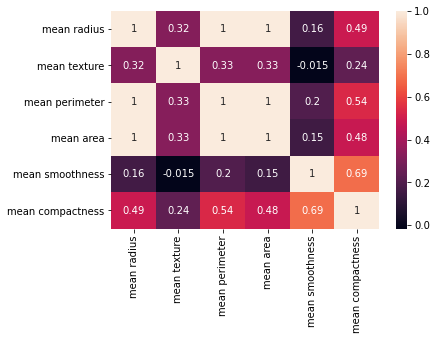

In [58]:
corr_mat_log = df_log.corr() # Padrão = Pearson
sns.heatmap(corr_mat_log, annot = True)
plt.show()

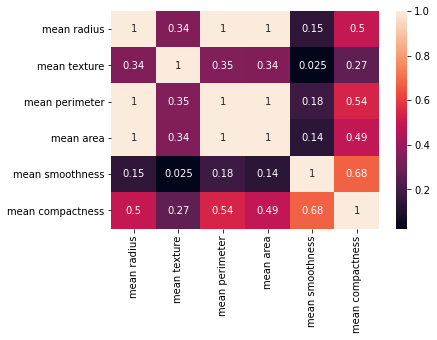

In [59]:
corr_mat_log = df_log.corr('spearman') # SPEARMAN
sns.heatmap(corr_mat_log, annot = True)
plt.show()

# Aplicando normalização com MinMax scaler

In [81]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler() #range default = 0~1
scaled_minmax = scaler.fit_transform(df_small)
df_minmax = pd.DataFrame(scaled_minmax, columns = df_small.columns)
print(df_minmax.shape)
df_minmax.head()

(569, 6)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893


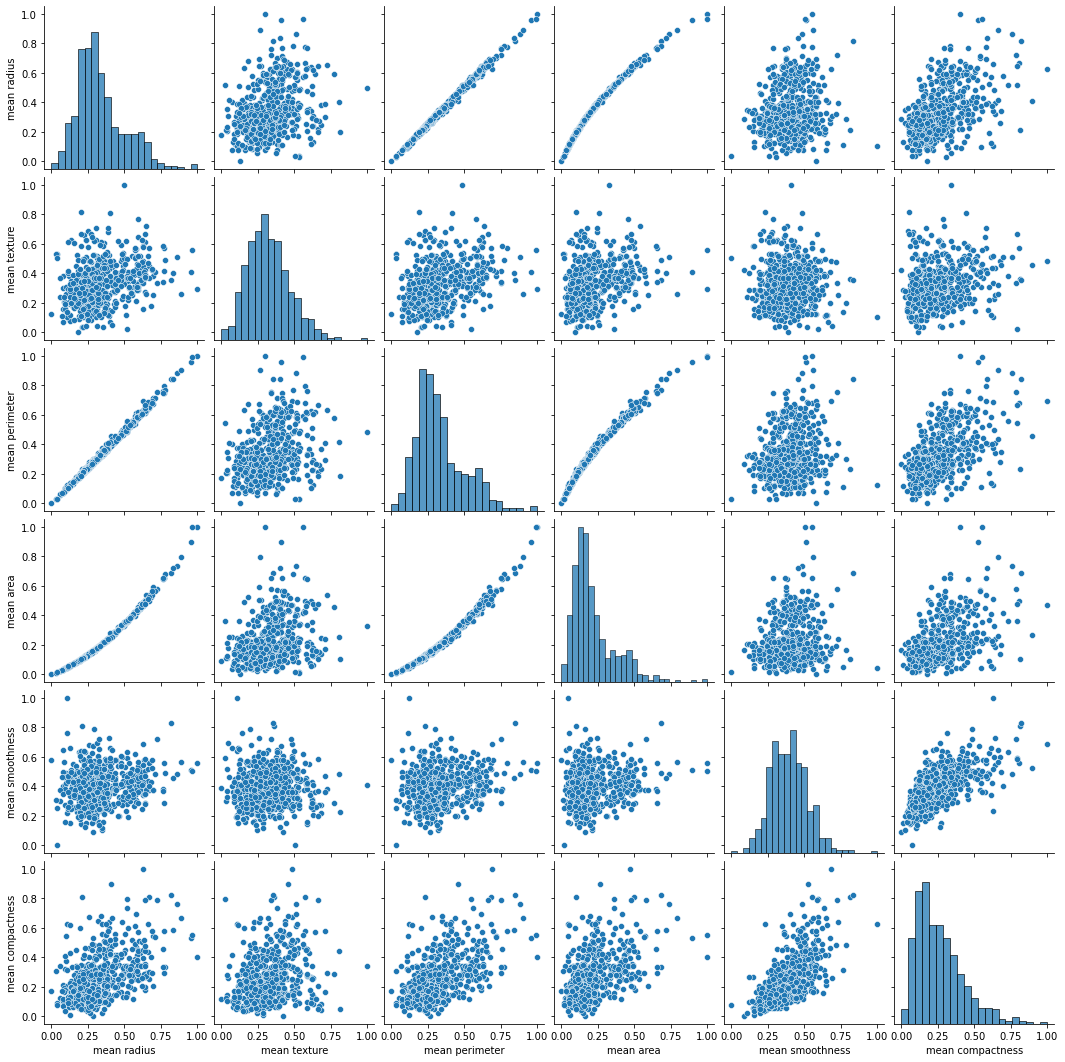

In [86]:
sns.pairplot(df_minmax)

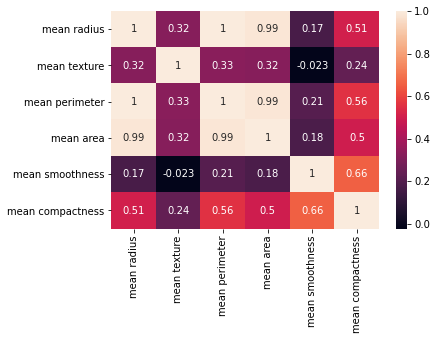

In [83]:
corr_mat_minmax = df_minmax.corr() # Padrão = Pearson
sns.heatmap(corr_mat_minmax, annot = True)
plt.show()

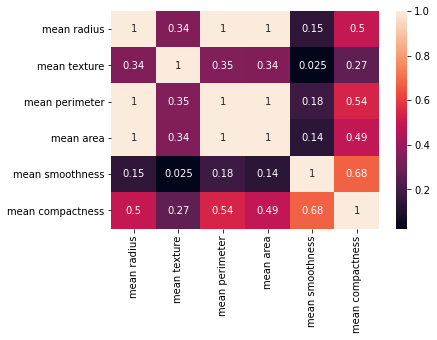

In [84]:
corr_mat_minmax = df_minmax.corr('spearman') # SPEARMAN
sns.heatmap(corr_mat_minmax, annot = True)
plt.show()

# Aplicando normalização com RobustScaler
    - Robusto a outliers
    - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html?highlight=robust%20scaler#sklearn.preprocessing.RobustScaler

In [89]:
Rscaler = preprocessing.RobustScaler() # default with_centering = True, with_scaling = True
scaled_robust = Rscaler.fit_transform(df_small)
df_robust = pd.DataFrame(scaled_robust, columns = df_small.columns)
print(df_robust.shape)
df_robust.head()

(569, 6)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832
1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653
2,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337
3,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045
4,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470


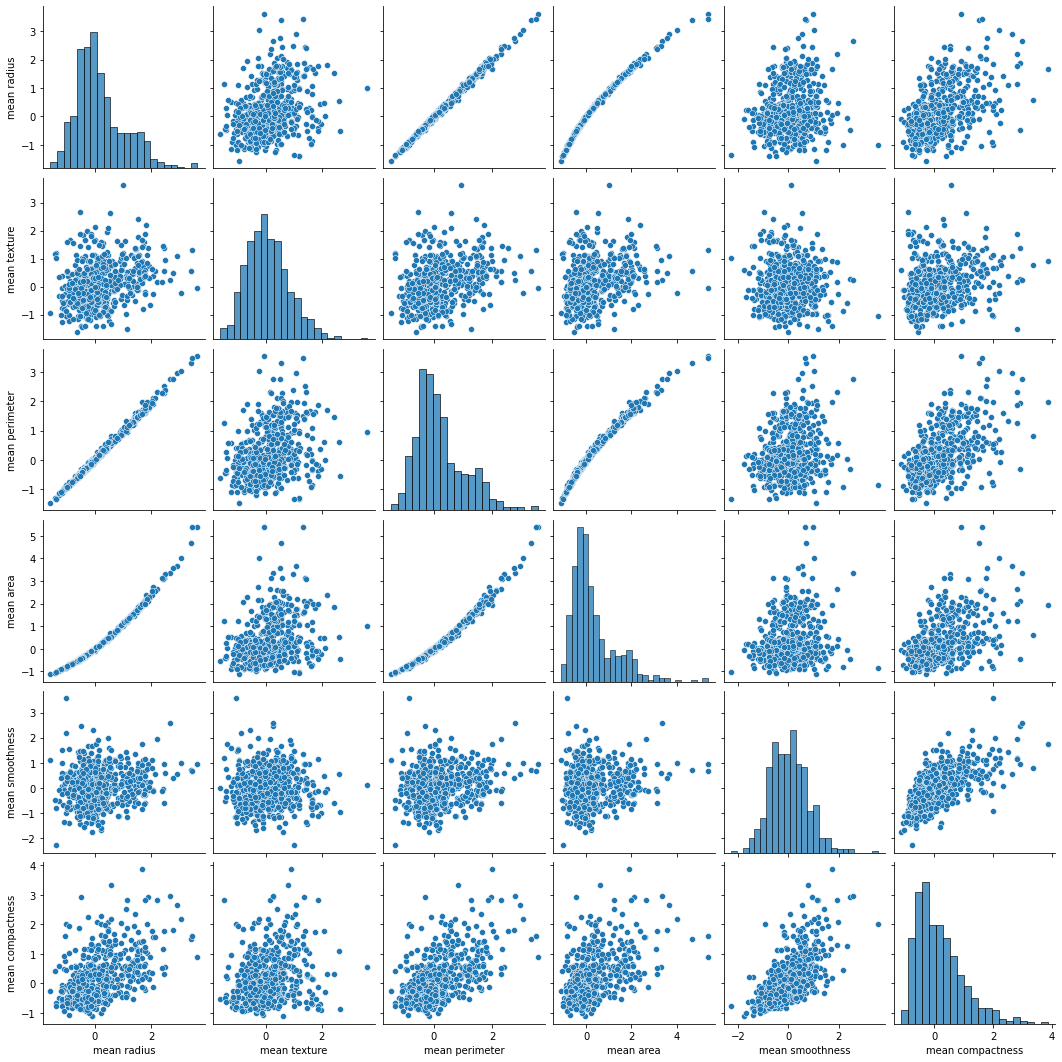

In [90]:
sns.pairplot(df_robust)

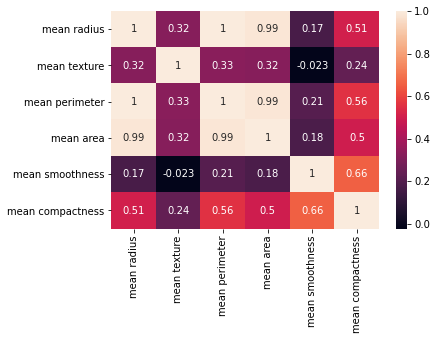

In [91]:
corr_mat_robust = df_robust.corr() # pearson
sns.heatmap(corr_mat_robust, annot = True)
plt.show()

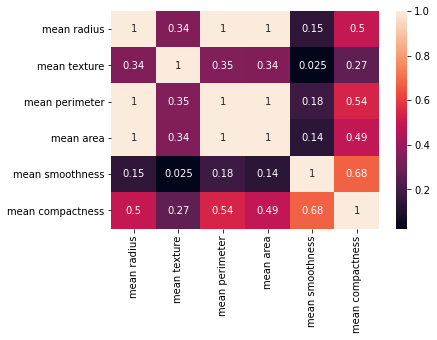

In [92]:
corr_mat_robust = df_robust.corr('spearman') # spearman
sns.heatmap(corr_mat_robust, annot = True)
plt.show()

### Data Normalization
Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1.

**Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values.** You may be able to estimate these values from your available data.

### Data Standardization
Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

This can be thought of as subtracting the mean value or centering the data.

Like normalization, standardization can be useful, and even required in some machine learning algorithms when your data has input values with differing scales.

**Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation**. You can still standardize your data if this expectation is not met, but you may not get reliable results.

- https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

# Aplicando Standard Scaler

In [104]:
from sklearn.preprocessing import StandardScaler
Sscaler = StandardScaler()
datastand = Sscaler.fit_transform(df_small)
df_stand2 = pd.DataFrame(datastand, columns = df_small.columns)
print(df_stand2.shape)
df_stand2.head()

(569, 6)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340


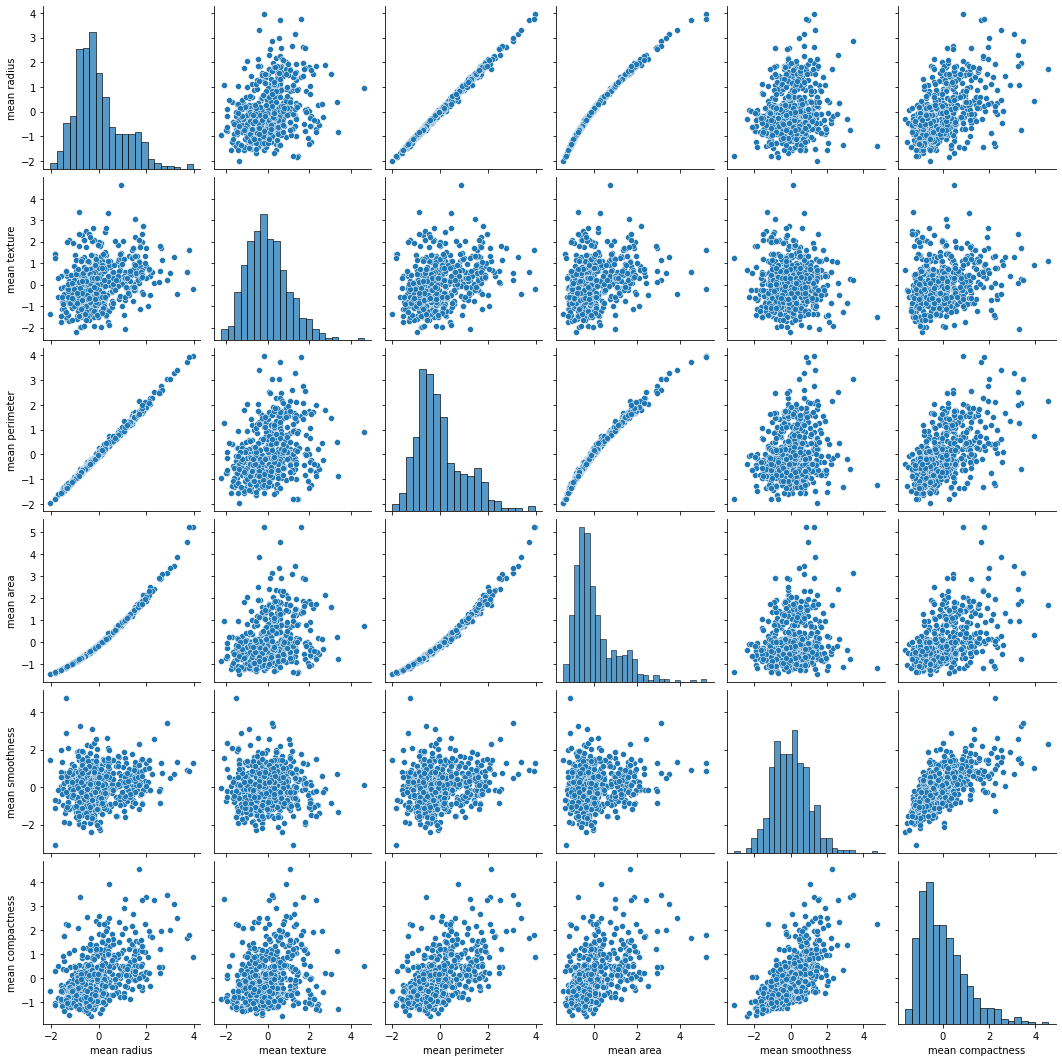

In [105]:
sns.pairplot(df_stand2)

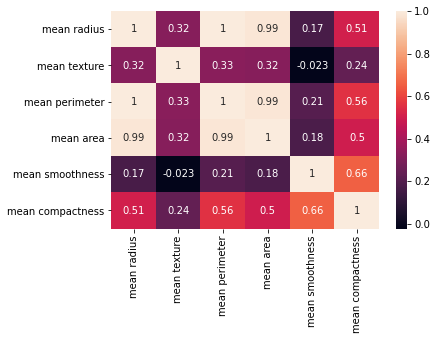

In [106]:
corr_mat_stand2 = df_stand2.corr() # pearson
sns.heatmap(corr_mat_stand2, annot = True)
plt.show()

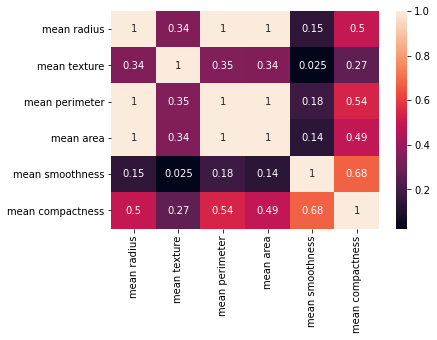

In [107]:
corr_mat_stand2 = df_stand2.corr('spearman') # spearman
sns.heatmap(corr_mat_stand2, annot = True)
plt.show()

## Conclusão
    -Tanto normalização quanto escalonamento não parecem influenciar na correlação.
    -A função preprocessing.normalize deve ser utilizada para vetores : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html

*"ρxy=Cov(x,y) / (σxσy)*

*where:*

*ρxy=Pearson product-moment correlation coefficient*

*Cov(x,y)=covariance of variables x and y*

*σx=standard deviation of x*

*σy=standard deviation of y*

*in this case, correlation is normalized by standard deviation. Therefore, no need to normalize them initially"*

O comentário acima foi retirado da discussão sobre o assunto em : 
https://www.researchgate.net/post/Do_we_need_to_standardize_variables_with_different_scales_before_doing_correlation_analysis